# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2019</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 1. Hay un notebook por ejercicio planteado.

* [Ejercicio 1 - Redes Neuronales](#Ejercicio1) (35 puntos)

In [1]:
# Se importan las bibliotecas que se utilizarán
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


<a id="Ejercicio1"></a>
## Ejercicio 1: Completar la implementación de una red neuronal de dos capas


In [2]:
# funciones auxiliares (Ejecutar y seguir)
def error_relativo(x, y):
    ''' devuelve el error relativo'''
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def calcular_gradiente_numerico_array(f, x, df, h=1e-5):
    '''
    Evalúa el gradiente numérico para una función que acepta un arreglo numpy y
    devuelve un arreglo numpy.
    '''
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval

        grad[ix] = np.sum((pos - neg) * df) / (2 * h)
        it.iternext()
    return grad


def calcular_gradiente_numerico(f, x, verbose=True, h=0.00001):
    '''
    Evalúa el gradiente numérico de f en x
    - f es una función que recibe un solo argumente
    - x es el punto (numpy array) en que se evalúa el gradiente
    '''
    
    # se inicializa el gradiente 
    grad = np.zeros_like(x)
    # se define un iterador sobre todos los elementos de x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # se evalúa la función en x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # se suma h al valor original de x
        fxph = f(x) # se evalúa f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # se evalúa f(x - h)
        x[ix] = oldval # se restaura el valor original de x

        # se calcula la derivada parcial con la fórmula centrada
        grad[ix] = (fxph - fxmh) / (2 * h) 
        if verbose:
            print(ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

## Descripción del ejercicio

En este ejercicio se implementarán algunos de los bloques constitutivos de una red neuronal de **tres capas**. El diagrama muestra el diagrama de bloques para la red de dos capas implementada en el práctico. 

<img src="img/diagrama_de_bloques.png" alt="drawing" width="500"/>

A continuación se describen los bloques:
- **Inicializar parámetros:** Inicializa los parámentros de la red. A los pesos de la capa $l$ de la red les llamaremos $W_l$, $b_l$ con $l=1,2,3$. 
- **Propagación hacia adelante:** La *propagación hacia adelante*  o *forward propagation* consiste en estimar la salida de la red a partir de la entrada. Cada nodo o capa de la red tiene un método *forward* asociado. Se proveen las implementaciones de los métodos forward asociados a los siguientes bloques:
        - Afin
        - Activación 
        - Afin --> Activación
        
- **Loss:** Calcula el valor de la función de costo a optimizar. Se implementarán dos funciones de costo:
        - Entropía cruzada
        - Entropía cruzada regularizada
- **Propagación hacia atrás:** Durante la *propagación hacia atrás* o *backpropagation* se calculan los gradientes necesarios para actualizar los parámetros de la red. Se implementarán métodos *backward* para los siguientes bloques:
        - Afin
        - Activación 
        - Afin --> Activación
- **Update:** Es el boque encargado de actualizar los parámetros. Para ello utiliza los gradientes calculados durante la *propagación hacia atrás* y un método de optimización. Se utilizará *descenso por gradiente* como método de optimización.

## 1- Bloque de Inicialización

Se implementará el bloque de inicialización para el caso de una red neuronal de **tres capas** con la siguiente estructura:    
  Afin --> Activación 1 --> Afin --> Activacion 2 --> Afin --> Activación 3       

### Parte a) 
Completar la implementación de `inicializar_pesos()`. Los pesos $W_l$ serán inicializados en valores aleatorios con distribución gaussiana de desviación estandar $\sigma_l=1/\sqrt{d_{l-1}}$, siendo $d_{l-1}$ el número de nodos de la capa $l-1$. Por ejemplo, para la primera capa $l=1$, la cantidad de nodos $d_{l-1}=d_0$ corresponde a la dimensión del vector de características. Los pesos correspondientes a términos de *bias* se inicializarán a cero. 

**Nota:** No necesario realizar una implementación genérica. Alcanza con que funcione para una red de tres capas.

In [112]:
def inicializar_pesos(dims, semilla=1):
    """
    Entrada:
        dims: lista que contiene el número de nodos de cada una de las capas. El primer elemento
              corresponde al tamaño del vector de características y el último a la cantidad de 
              nodos en la última capa oculta.
        semilla: semilla a utilizar para generar los valores aleatorios
    
    Salida:
        parametros: diccionario de python que contiene los parámetros inicializados 
                    parametros['W' + str(l)] = ... 
                    parametros['b' + str(l)] = ...
    """
    
    np.random.seed(semilla)
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    # Sugerencia: puede ser útil utilizar np.random.randn() y ajustar la desviación estándar
    W1 = (1/np.sqrt(dims[0])) * np.random.randn(dims[0], dims[1])
    b1 = np.zeros(dims[1])
    W2 = (1/np.sqrt(dims[1])) * np.random.randn(dims[1], dims[2])
    b2 = np.zeros(dims[2])
    W3 = (1/np.sqrt(dims[2])) * np.random.randn(dims[2], dims[3])
    b3 = np.zeros(dims[3])
    
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
   
    # Se genera el diccionario con los valores inicializados
    parametros = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2,
                  'W3': W3,
                  'b3': b3}
    
    return parametros    

In [113]:
# Se testea la inicialización con pesos aleatorios
dims = [3,6,3,1]
parametros = inicializar_pesos(dims)

W1_correcto = np.array([[ 0.93781623, -0.35319773, -0.3049401 , -0.61947872,  0.49964333, -1.32879399],
                       [ 1.00736754, -0.43948301,  0.18419731, -0.14397405,  0.84414841, -1.18942279],
                         [-0.18614766, -0.22173389,  0.65458209, -0.63502252, -0.09955147, -0.50683179]])
b1_correcto = np.array([0., 0., 0., 0., 0., 0.])
W2_correcto = np.array([[ 0.01723369,  0.23793331, -0.4493259 ],[ 0.4673315 ,  0.36807287,  0.20514245],
                       [ 0.3677729 , -0.27913073, -0.05016972], [-0.38202627, -0.10936485,  0.21651671],
                       [-0.28236932, -0.16197395, -0.28053708], [-0.34505376, -0.27403509, -0.0051703 ]])
b2_correcto = np.array([0., 0., 0.])  
W3_correcto = np.array([[-0.64507943],
       [ 0.13533997],
       [ 0.95828723]])
b3_correcto = np.array([0.])

# Se compara la salida con la nuestra. El error debería ser e-7 o menos.
print('Testeando la incialización aleatoria:')
print('Diferencia en W1: ', error_relativo(parametros['W1'], W1_correcto))
print('Diferencia en b1: ', error_relativo(parametros['b1'], b1_correcto))
print('Diferencia en W2: ', error_relativo(parametros['W2'], W2_correcto))
print('Diferencia en b2: ', error_relativo(parametros['b2'], b2_correcto))
print('Diferencia en W3: ', error_relativo(parametros['W3'], W3_correcto))
print('Diferencia en b3: ', error_relativo(parametros['b3'], b3_correcto))

Testeando la incialización aleatoria:
Diferencia en W1:  1.1841719957328453e-08
Diferencia en b1:  0.0
Diferencia en W2:  8.297892749808612e-08
Diferencia en b2:  0.0
Diferencia en W3:  1.3902130737322008e-08
Diferencia en b3:  0.0


## 2- Bloques Forward

Se proveen las implementaciones de los métodos *forward* de los siguientes bloques: 

- Bloque Afin  
- Bloque Activación donde la activación puede ser ReLU, Sigmoide
- Bloque Afin -> Activación  

### 2.1 - Forward Afin

La señal de entrada a la activación de la capa $\textit{l}$ puede escribirse como:

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

donde $\mathbf{s}^{(l)}$ y $\mathbf{b}^{(l)}$ son vectores de tamaño $d^{(l)}$, $\mathbf{x}^{(l-1)}$  es un vector de tamaño $d^{(l-1)}$ y $W^{(l)}$ es una matriz de tamaño $d^{(l-1)} \times d^{(l)}$.

La ecuación (1) es válida cuando la entrada a la capa es un único vector $\mathbf{x}^{(l-1)}$. En la práctica es más habitual procesar un $\textit{batch}$ de vectores de entrada a la vez, por lo tanto es deseable contar con una expresión que genere la salida para todos los vectores de entrada a la vez. Al evitar la utilización de un bloque $\textit{for}$ que itere por cada una de las muestras del $\textit{batch}$ se mejora la eficiencia de la implementación.   


La versión de la ecuación (1) que actúa sobre un conjunto de muestras a la vez es la siguiente:

$$
S^{(l)} = X^{(l-1)}W^{(l)} +b^{(l)}\tag{2}
$$

donde $X^{[0]} = X$, siendo X una matriz que contiene un vector de características en cada fila.

In [16]:
def afin_forward(X, W, b):
    """
    Implementa la propagación hacia adelante en una capa afin.

    Entrada:
        X: matriz de tamaño (N, dim capa anterior) que en cada fila contiene un vector de
           activaciones de la capa anterior (o datos de entrada)
        W: matriz de pesos de tamaño (dim de capa anterior, dim de capa actual) 
        b: vector de bias de tamaño (dim de la capa actual,)

    Salida:
        S: matriz de tamaño (N, dim de capa actual) que contiene
           los scores o señal de entrada a la activación  
        cache: (X, W, b) tupla que contiene X, W y b. 
               Son almacenados para calcular el paso backward eficientemente
    """

    S = np.dot(X, W) + b
    
    assert(S.shape == (X.shape[0], W.shape[1] ))
    cache = (X, W, b)
    
    return S, cache

### 2.2 - Funciones de activación

Se proveen las implementaciones de las siguientes funciones de activación:

- **Sigmoide**: $\sigma(S) = \sigma(X W  + \mathbf{b}) = \frac{1}{ 1 + e^{-(X W  + b)}}$. Esta función devuelve, además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).

``` python
X, cache = sigmoid(S)
```


- **Rectified Linear Unit**:  $ReLU(S) = \max(0, S)$.  Al igual que en el caso de la activación sigmoide, esta función devuelve además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).

``` python
X, cache = relu(S)
```

In [17]:
def sigmoide(S):
    """
    Implementa la activación sigmoide
    
    Entrada:
        S: arreglo numpy que contiene las entradas a la activación. 
           Las dimensiones de entrada no están definidas.
    
    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de sigmoid(S) 
    cache: devuelve S para utilizar durante la propagación hacia atrás
    """

    X = 1/(1+np.exp(-S))
    cache = S

    assert X.shape == S.shape, 'La entrada y la salida deben ser del mismo tamaño'
    return X, cache

In [18]:
def relu(S):
    '''
    Implementa la activación relu
    
    Entrada:
        S: arreglo numpy que contiene las entradas a la activación. 
           Las dimensiones de entrada no están definidas.
    
    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de relu(S) 
    cache: devuelve S para utilizar durante la propagación hacia atrás
    '''
    
    X = np.maximum(0,S)
    
    assert(X.shape == S.shape)
    cache = S 
        
    return X, cache

### 2.3 - Aplicación conjunta de capa afin y activación

Se provee la implementación de la propagación hacia adelante de una capa *Afin->Activacion*. El método `afin_activacion_forward()` implementa la operación:

$$
X^{[l]} = \theta(S^{(l)}) = \theta(X^{(l-1)}W^{(l)} +b^{(l)})
$$

donde la activación $\theta(\cdot)$ será alguna de las implementadas. 

In [19]:
def afin_activacion_forward(X_prev, W, b, activacion):
    """
    Implementa la propagación hacia adelante para una capa Afin->Activación 
    Entrada:
        X_prev: arreglo de tamaño (N, dim capa anterior) que contiene la 
                activación de la capa anterior (o datos de entrada):          
        W: matriz de pesos de tamaño (dim de capa anterior, dim de capa actual)  
        b: vector de bias de tamaño (dim de la capa actual)
        activacion: la activacion a utilizar en esta capa se indica con uno de los 
                    siguientes strings: 'sigmoide', 'tanh' o 'relu'

    Salida:
        X: arreglo de tamaño (N, dim de capa actual) que contiene la salida 
           de la función de activación  
    cache: tupla que contiene "cache_afin" y "cache_activacion".
           Se almacenan para calcular la propagación hacia atrás eficientemente
    """
    

    S, cache_afin = afin_forward(X_prev,W,b)
    
    if activacion == 'sigmoide':    
        
        X, cache_activacion = sigmoide(S)
    
    elif activacion == 'relu':
        
        X, cache_activacion = relu(S)
    
    assert (X.shape == (X_prev.shape[0], W.shape[1]))
    cache = (cache_afin, cache_activacion)

    return X, cache

## 3 - Función de costo

En esta sección se implementarán dos funciones de costo.  

- **Entropía cruzada:** Es la función de costo más utilizada en problemas de clasificación binaria. Se recuerda que la misma se define mediante la fórmula:
$$
H(\mathbf{\mathbf{x}^{(L)}}, \mathbf{y})= -\frac{1}{N} \sum\limits_{n = 1}^{N} \left( y_n\log x^{(L)}_n + (1-y_n)\log\left(1- x^{(L)}_n\right) \right) \tag{3}
$$

- **Entropía cruzada regularizada:** Es la versión regularizada de la *entropía cruzada* definida anteriormente:
$$
H_{reg}(\mathbf{\mathbf{x}^{(L)}}, \mathbf{y})= -\frac{1}{N} \sum\limits_{n = 1}^{N} \left( y_n\log x^{(L)}_n + (1-y_n)\log\left(1- x^{(L)}_n\right) \right) + \frac{1}{2N}\sum_{l=1}^{L} \Vert W_l \Vert_2^2 \tag{4}
$$

### Parte b) 
Implementar el método `entropia_cruzada_regularizada()`. De manera similar a la implementación de `entropia_cruzada()` provista, la función deberá devolver, además del costo, el gradiente del costo respecto al vector $\mathbf{x}^{(L)}$ (salida de la red y entrada del bloque *Loss*).

In [22]:
def entropia_cruzada(xL, y):
    """
    Implementa la entropía cruzada

    Entrada:
        xL: vector de dimensión (N,1) que contiene las ¨probabilidades¨ de pertenecer a la clase positiva 
            estimadas por el modelo
        y: vector de etiquetas de dimesión (N,1) (con unos para la clase positiva y 0 para la negativa)

    Salida:
        costo: escalar con el costo calculado
        dxL: gradiente del costo respecto a xL, tiene las mismas dimensiones que xL
    """
    
    N = len(y)

    logprobs = np.log(xL) * y + (1 - y) * np.log(1 - xL)
    costo = -np.mean(logprobs)
    
    dxL = -(np.divide(y, xL) - np.divide(1 - y, 1 - xL))/N

    costo = np.squeeze(costo) # Para asegurarnos que la salida sea un escalar (Ej: transforma [[12]] en 12).
    assert(costo.shape == ())
    assert(dxL.shape == xL.shape), 'Las dimensiones de dxL y xL deben ser iguales'
    return costo, dxL

In [52]:
def entropia_cruzada_regularizada(xL, y, parametros, factor_reg):
    """
    Implementa la entropía cruzada

    Entrada:
        xL: vector de dimensión (N,1) que contiene las ¨probabilidades¨ de pertenecer a la clase positiva 
            estimadas por el modelo
        y: vector de etiquetas de dimesión (N,1) (con unos para la clase positiva y 0 para la negativa)
        parametros: diccionario python que contiene los parametros de la red
        factor_reg: factor de regularización

    Salida:
        costo: escalar con el costo calculado (tomando en cuenta la regularización)
        dxL: gradiente del costo respecto a xL, tiene las mismas dimensiones que xL
    """
    
    N = len(y)
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    costo_EC, dxL_EC = entropia_cruzada(xL, y)
    
    norma_matrices = np.array([np.linalg.norm(parametros["W" + str(i+1)])**2 for i in range(3)])
    
    costo = costo_EC + (factor_reg/(2*N)) * np.sum(norma_matrices)
    
    dxL = dxL_EC
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    costo = np.squeeze(costo) # Para asegurarnos que la salida sea un escalar (Ej: transforma [[12]] en 12).
    assert(costo.shape == ())
    assert(dxL.shape == xL.shape), 'Las dimensiones de dxL y xL deben ser iguales'
    return costo, dxL

In [53]:
# Se testea la implementación de la entropía cruzada regularizada
np.random.seed(231)
num_classes, num_inputs = 2, 10
xL_ = np.random.rand(num_inputs,1)
y_ = np.random.randint(num_classes, size=(num_inputs,1))
W1_ = np.random.randn(5, 3)
W2_ = np.random.randn(3, 4)
W3_ = np.random.randn(4, 1)
param={'W1':W1_,'W2':W2_,'W3':W3_}
lambd = 0.1

dxL_num = calcular_gradiente_numerico(lambda xL: entropia_cruzada_regularizada(xL, y_, param, lambd)[0],
                                                 xL_, verbose=False)
costo, dxL = entropia_cruzada_regularizada(xL_, y_,  param, lambd)

# Testing la entropía cruzada regularizada. El costo debería dar cercano a 1.12 y el error en dP alrededor de 1e-8
print('\nTesting entropia_cruzada:')
print('costo: ', costo)
print('error en dP: ', error_relativo(dxL_num, dxL))


Testing entropia_cruzada:
costo:  1.1244552259459768
error en dP:  1.0993162320064296e-08


## 4 - Propagación hacia atrás

Se implementará la versión *backward* de cada una de las funciones *forward* implementadas anteriormente. A saber:
- AFIN backward
- ACTIVACION backward 
- AFIN -> ACTIVACION backward donde ACTIVACION puede ser *ReLU* o *sigmoide* 

### 4.1 - Afin backward

Durante la propagación hacia adelante en la capa $l$ (sin considerar la activación) se calcula para una muestra: 

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

Si se llama $e_n$ al costo debido a la muesta $n$ y se asume conocido el *vector de sensibilidad* $\delta^{(l)}=\frac{\partial e_n}{\partial \mathbf{s}^{(l)}}$, en el teórico del curso se vio que 

$$
\frac{\partial{e_n}}{\partial{W^{(l)}}}=\mathbf{x}^{(l-1)} \left( \delta^{(l)} \right)^T
$$

Análogamente a como se hizo en el caso de la propagación hacia adelante, si se considera la contribución al error de un conjunto de muestras a la vez la ecuación se puede escribir en forma vectorizada como:

$$
\frac{\partial{E}}{\partial{W^{(l)}}}= dW^{(l)} = \left( X^{(l-1)}\right)^ T dS^{(l)}   \tag{5}
$$

donde $dS^{(l)}$ es una matríz de tamaño $N\times d^{(l)}$ que en cada fila contiene el vector de sensibilidad $\delta^{(l)}_n$ correspondiente a una de las muestras.

Las derivadas respecto al vector de bias $\mathbf{b}^{(l)}$ se calculan de forma similar (puede pensarse como un caso particular en que $X^{(l-1)}$ es un vector columna de unos) por lo que

$$
\frac{\partial{E}}{\partial{\mathbf{b}^{(l)}}}= d\mathbf{b}^{(l)} =\mathbb{1} ^ T dS^{(l)}  \tag{6}
$$

Finalmente se calcula la influencia de cada una de las características en el error. Considerando primero el caso de una muestra, se tiene que:

$$
\frac{\partial{e_n}}{\partial{\mathbf{x}^{(l-1)}}} = W^{(l)} \delta^{(l)}
$$

que en forma vectorizada puede escribirse como:

$$ 
 \frac{\partial E }{\partial X^{(l-1)}} = dX^{(l-1)} = dS^{(l)} \left( W^{(l) }\right)^T \tag{7}
$$

### Parte c) 
Implementar el método `afin_backward()`.

In [105]:
def afin_backward(dS, cache):
    """
    Implementa la propagación hacia atrás para una capa l (sin considerar la activación)

    Entrada:
        dS: Gradiente de la función de costo con respecto a la salida de la capa actual 
            (sin considerar la activación)
        cache: tupla de valores (X_prev, W, b) calculados durante la propagación hacia adelante
               de la capa actual

    Salida:
        dX_prev: Gradiente de la función de costo con respecto a la activación de la capa anterior (l-1), 
                 tiene el mismo tamaño que X_prev
        dW: Gradiente de la función de costo con respecto a W (de la capa actual l), 
            tiene el mismo tamaño que W
        db: Gradiente de la función de costo con respecto a b (de la capa actual l), 
            tiene el mismo tamaño que b
    """
    X_prev, W, b = cache
    N = X_prev.shape[0]

    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    dX_prev = dS @ W.T
    
    dW = X_prev.T @ dS
    
    db = np.ones(N) @ dS
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    assert (dX_prev.shape == X_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dX_prev, dW, db

In [106]:
# Test de afin_backward
np.random.seed(43)
x = np.random.randn(10, 6)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

#dx_num = calcular_gradiente_numerico_array(lambda x: afin_forward(x, w, b)[0], x, dout)
dx_num = calcular_gradiente_numerico_array(lambda xx: afin_forward(xx, w, b)[0], x, dout)

dw_num = calcular_gradiente_numerico_array(lambda ww: afin_forward(x, ww, b)[0], w, dout)
db_num = calcular_gradiente_numerico_array(lambda bb: afin_forward(x, w, bb)[0], b, dout)

_, cache = afin_forward(x, w, b)
dx, dw, db = afin_backward(dout, cache)

# El error debería ser del orden de e-9 o menos
print('Testing afin_backward():')
print('dx error: ', error_relativo(dx_num, dx))
print('dw error: ', error_relativo(dw_num, dw))
print('db error: ', error_relativo(db_num, db))

Testing afin_backward():
dx error:  3.669042497648924e-09
dw error:  3.7482312588464514e-11
db error:  1.640806364146397e-11


### 4.2 - Activación backward

Si  $\theta(\cdot)$ es la función de activación, entonces su función *backward* se calcula 

$$
dS^{(l)} = dX^{(l)} * \theta'(S^{(l)})   \tag{8}
$$.  

donde $\theta'(\cdot)$ debe ser calculado para cada caso. 

### Parte d) 
Implementar los métodos *backward* cada una de las funciones de activación implementadas

In [61]:
def sigmoide_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación Sigmoide.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa sigmoide,
              el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Returns:
    dS -- Gradiente del costo respecto a S
    """
    
    S = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    
    dS = dX * (np.exp(-S) /(1+np.exp(-S))**2)
    
     
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    assert (dS.shape == S.shape), 'dS y S no tienen el mismo tamaño'
    assert (dX.shape == S.shape), 'dX y S no tienen el mismo tamaño'
    
    return dS

In [62]:
# Test de sigmoid_backward
np.random.seed(231)
S = np.random.randn(10, 10)
dout = np.random.randn(*S.shape)

dS_num = calcular_gradiente_numerico_array(lambda S: sigmoide(S)[0], S, dout)

_, cache = sigmoide(S)
dS = sigmoide_backward(dout, cache)

# El error debería ser del orden de e-10 o menos
print('Testing relu_backward():')
print('dS error: ', error_relativo(dS_num, dS))


Testing relu_backward():
dS error:  3.44651192693257e-11


In [81]:
def relu_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación ReLu.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa relu,
              el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Returns:
    dS -- Gradiene del costo respecto a S
    """
    
    S = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    dS = dX * (S > 0)
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    assert (dS.shape == S.shape)
    
    return dS

In [82]:
# Test de relu_backward
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dS_num = calcular_gradiente_numerico_array(lambda x: relu(x)[0], x, dout)

_, cache = relu(x)
dS = relu_backward(dout, cache)

# El error debería ser del orden de e-12
print('Testing relu_backward():')
print('dS error: ', error_relativo(dS_num, dS))


Testing relu_backward():
dS error:  3.2756349136310288e-12


### 4.3 - Afin --> Activacion backward

A continuación se implementará la función que realiza la propagación hacia atrás del la capa *Afin-->Activacion*. 

### Parte e) 
Implementar la función `afin_activacion_backward()`. Para ello utilizar las funciones implementadas anteriormente: `afin_backward` y la ¨`activacion_backward`¨ que corresponda. 


In [83]:
def afin_activacion_backward(dX, cache, activacion):
    '''
    Implementar la propagación hacia atrás para la capa Afin->Activacion.
    
    Entradas:
        dX: gradiente del costo respecto a la salida de la capa actual 
        cache: tupla con los valores(cache_afin, cache_activacion) 
        activacion: la activación a utilizar en esta capa, puede ser 'sigmoide' o 'relu'
    Salidas:
        dX_prev: Gradiente del costo con respecto a la activación de la capa anterior(l-1), 
                 tiene las mismas dimensiones que X_prev
        dW -- Gradiente del costo con respecto a W (de la capa actual l), 
              tiene las mismas dimensiones que W
        db -- Gradiente del costo con respecto a b (de la capa actual l), 
              tiene las mismas dimensiones que b
    '''
    cache_afin, cache_activacion = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    if activacion == 'relu':
        dS = relu_backward(dX, cache_activacion)

    elif activacion == 'sigmoide':
        dS = sigmoide_backward(dX, cache_activacion)
        
    dX_prev, dW, db = afin_backward(dS, cache_afin)
       

    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    return dX_prev, dW, db

In [84]:
np.random.seed(231)
x = np.random.randn(2, 12)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

activaciones = ['relu', 'sigmoide']

for activacion in activaciones:
    out, cache = afin_activacion_forward(x, w, b, activacion)
    dx, dw, db = afin_activacion_backward(dout, cache, activacion)

    dx_num = calcular_gradiente_numerico_array(lambda x: afin_activacion_forward(x, w, b, activacion)[0], x, dout)
    dw_num = calcular_gradiente_numerico_array(lambda w: afin_activacion_forward(x, w, b, activacion)[0], w, dout)
    db_num = calcular_gradiente_numerico_array(lambda b: afin_activacion_forward(x, w, b, activacion)[0], b, dout)

    # Los errores deberían ser del orden de e-9 o menos
    print('Testing afin_' + activacion + '_forward y afin_' + activacion + '_backward:')
    print('dx error: ', error_relativo(dx_num, dx))
    print('dw error: ', error_relativo(dw_num, dw))
    print('db error: ', error_relativo(db_num, db))

Testing afin_relu_forward y afin_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12
Testing afin_sigmoide_forward y afin_sigmoide_backward:
dx error:  1.2457054025023588e-10
dw error:  2.7821293383972562e-09
db error:  1.5238194515875374e-10


##  5 - Actualización de los parámetros

En esta sección se actualizarán los parámetros del modelo mediante el método de *descenso por gradiente*:

$$ W^{(l)} = W^{(l)} -\eta \text{ } dW^{(l)} \tag{9}$$
$$ \mathbf{b}^{(l)} = \mathbf{b}^{(l)} -\eta \text{ } \mathbf{db}^{(l)} \tag{10}$$

donde $\eta$ es el *learning rate*. 

### Parte f) 
Implementar `actualizar_parametros()` para actualizar los parámetros usando *descenso por gradiente*. Luego de actualizar los parámetros, almacenarlos en el diccionario de parámetros. 

In [86]:
def actualizar_parametros(parametros, gradientes, learning_rate):
    """
    Se actualizan los parámetros utilizando descenso por gradiente. Si bien en este notebook se trabaja 
    con una red de dos capas, el método se implementa en forma genérica para mostrar como se haría en el
    caso más general.
    
    Entrada:
        parametros: diccionario de python que contiene los parámetros 
        gradientes: diccionario de python que contiene los gradientes 
                    (las salidas de los métodos backward)
    
    Salida:
        parametros: diccionario de python que contiene los parámetros actualizados 
                    parametros["W" + str(l)] = ... 
                    parametros["b" + str(l)] = ...
    """
    
    L = len(parametros) // 2 # número de capas en la red neuronal
    
    # Se actualiza cada uno de los parámetros. En el caso de una red profunda de L capas
    # se hace con un loop que va recorriendo cada parámetro
    for l in range(1,L+1):
        
        ####################################################################################
        ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
        
        parametros["W"+str(l)] = parametros["W"+str(l)] - learning_rate * gradientes["W"+str(l)]
        
        parametros["b"+str(l)] = parametros["b"+str(l)] - learning_rate * gradientes["b"+str(l)]
        
        ####################################################################################
        ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
    
    return parametros

# Clasificación utilizando datos sintéticos

In [87]:
from aux_datos import load_2D_dataset, mostrar_frontera_decision

Se generan datos sintéticos con forma de flor pertenecientes a dos clases: $cero$ y $uno$.

In [88]:
X_train, Y_train, X_test, Y_test = load_2D_dataset()
print(X_train.shape, Y_train.shape)

(211, 2) (211, 1)


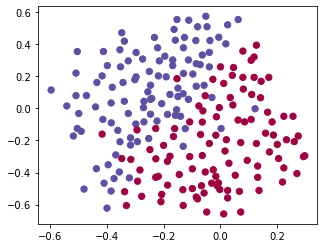

In [89]:
# Se muestran los datos
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train.ravel(), s=40, cmap=plt.cm.Spectral);

### Red para clasificar los datos sintéticos

Para clasificar los datos sintéticos se utilizará una red de **tres capas** con la siguiente arquitectura:   

*Afin->Relu->Afin->Relu-->Afin-->Sigmoide* 

### Parte g)  
Completar la implementación del método `red_tres_capas()` utilizando los métodos *forward* y *backward* adecuados para dicha arquitectura. Como función de costo se utilizará la *entropía cruzada*.

**Nota:** La función tiene previsto un parámetro para indicar si se aplica o no regularización y otro parámetro para el factor de regularización. En esta parte no hay que utilizar ninguno de estos parámetros, o bien asumir que `regularizar` es `False`. La regularización se implementará en una parte posterior.  

In [117]:
def red_tres_capas(X, Y, dims_capas, num_iter = 1000, learning_rate = 1,
                    mostrar_costo=False, semilla=100, regularizar=False, reg_factor=1):
    """
    Implementa una red neuronal de tres capas: Afin -> Relu -> Afin -> Relu -> Afin -> Sigmoide.
    
    Entrada:
        X: datos de entrada, de tamaño (N, d_0)
        Y: etiquetas (1 para la clase positiva y 0 para la negativa), de tamaño (N,1)
        dims_capas: dimensiones de las capas(d_0, d_1, d_2, d_3)
        num_iter: número de iteraciones del loop de optimización
        learning_rate: learning rate utilizado para la actualización mediante descenso por gradiente
        mostrar_costo: Si vale True, se muestra el costo cada 100 iteraciones 
        semilla: semilla utilizada para la generación de números aleatorios
        regularizar: indica si se aplica o no regularización
        reg_factor: factor de regularización
    Salida:
        parametros: un diccionario de python que contiene W1, W2, W3, b1, b2 and b3
    """
    
    np.random.seed(semilla)
    gradientes = {} # se inicializa el diccionario que almacena los gradientes
    costos = []     # lista que almacena el costo
    N = X.shape[0]  # número de muestras
    
    # Se inicializan los parámetros del diccionario llamando a una de las 
    # funciones previamente implementadas
    parametros = inicializar_pesos(dims_capas, semilla=semilla)
     
    # Se obtienen W1, b1, W2 y b2 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]
    W3 = parametros["W3"]
    b3 = parametros["b3"]
    # Loop (descenso por gradiente)

    for i in range(0, num_iter):

        ####################################################################################
        ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
        
        # Propagación hacia adelante: Afin -> Relu -> Afin -> Relu -> Afin -> Sigmoide. 
        # Entradas: "X, W1, b1". Salidas: "X1, cache1, X2, cache2, X3, cache3".
        X1, cache1 = afin_activacion_forward(X, W1, b1, "relu")
        X2, cache2 = afin_activacion_forward(X1, W2, b2, "relu")
        X3, cache3 = afin_activacion_forward(X2, W3, b3, "sigmoide")
        
        
        # Se calcula el costo y se inicia la propagación hacia atrás
        if regularizar:
            costo, dX3 = entropia_cruzada_regularizada(X3, Y, parametros, factor_reg=reg_factor)
        else:
            costo, dX3 = entropia_cruzada(X3, Y)
        
        # Propagación hacia atrás. 
        # Entradas: "dX3, cache3, cache2, cache1". 
        # Salidas: "dX2, dW3, db3, dX1, dW2, db2, dW1, db1, dX0 (no utilizado)".
        
        dX2, dW3, db3 = afin_activacion_backward(dX3, cache3, "sigmoide")
        dX1, dW2, db2 = afin_activacion_backward(dX2, cache2, "relu")
        dX0, dW1, db1 = afin_activacion_backward(dX1, cache1, "relu")
        
        # Se almacenan los gradientes recientemente calculados en el diccionario 
        gradientes["W1"] = dW1
        gradientes["b1"] = db1
        gradientes["W2"] = dW2
        gradientes["b2"] = db2
        gradientes["W3"] = dW3
        gradientes["b3"] = db3
        
        
        # Se actualizan los parámetros
        parametros = actualizar_parametros(parametros, gradientes, learning_rate=learning_rate)
        
        
        ####################################################################################
        ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################

        # Se obtienen los nuevos W1, b1, W2, b2, W3 y b3 del diccionario de parámetros.        
        W1 = parametros["W1"] 
        b1 = parametros["b1"]
        W2 = parametros["W2"]
        b2 = parametros["b2"]
        W3 = parametros["W3"]
        b3 = parametros["b3"]

        
        # Se muestra la evolución del costo cada 100 iteraciones
        if mostrar_costo and i % 1000 == 0:
            print("Costo luego de iteracion {}: {}".format(i, np.squeeze(costo)))

        if mostrar_costo and i % 1000 == 0:
            costos.append(costo)
    
    # se muestra el costo
    if mostrar_costo:    
        plt.plot(np.squeeze(costos))
        plt.ylabel('costo')
        plt.xlabel('iteraciones (sobre 100)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    return parametros

In [115]:
### Se definen las constantes que determinan la arquitectura de la red ####
d_0 = X_train.shape[1]   
d_1 = 20
d_2 = 3
d_3 = 1
#dims_capas = [d_0, d_1, d_2, d_3]

Costo luego de iteracion 0: 0.6531739388939833
Costo luego de iteracion 1000: 0.22820505946807904
Costo luego de iteracion 2000: 0.22137627010116256
Costo luego de iteracion 3000: 0.21570940807693872
Costo luego de iteracion 4000: 0.2082980118425003
Costo luego de iteracion 5000: 0.2057106433090407
Costo luego de iteracion 6000: 0.19533532426986952
Costo luego de iteracion 7000: 0.19149975018157558
Costo luego de iteracion 8000: 0.18577505574994574
Costo luego de iteracion 9000: 0.1809689308190518
Costo luego de iteracion 10000: 0.17626810028296294
Costo luego de iteracion 11000: 0.17378865348581302
Costo luego de iteracion 12000: 0.17035566643760724
Costo luego de iteracion 13000: 0.16149260231048693
Costo luego de iteracion 14000: 0.15500243094096444
Costo luego de iteracion 15000: 0.1570558498627529
Costo luego de iteracion 16000: 0.15057352843767316
Costo luego de iteracion 17000: 0.1501737830858241
Costo luego de iteracion 18000: 0.1468701911007264
Costo luego de iteracion 19000: 

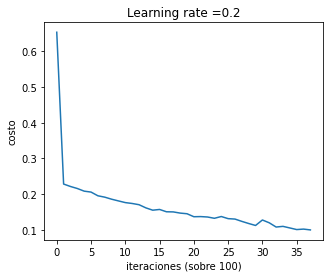

In [131]:
# Se entrena la red, con los parámetros por defecto el costo debería ser alrededor de 0.65 en la iteración 0 y 
# menor a 0.15 en la 20000
parametros_red_3capas = red_tres_capas(X_train, Y_train, dims_capas = [d_0, d_1, d_2, d_3], 
                                    learning_rate = 0.2, num_iter = 38000, mostrar_costo=True,
                                    regularizar=False)

### Mostrar la frontera de decisión

### Parte h)  
Mostrar la frontera de decisión. Para ello se deberá completar primero la implementación del método `predecir_clase_datos_sinteticos()`. Dicho método utiliza los parámetros de la red recientemente encontrados para predecir la clase de los vectores de características pasados como parámetro. 

In [119]:
def predecir_clase_datos_sinteticos(X, parametros):
    """
    Esta función predice la clase de los datos sintéticos. 
    
    Entrada:
        X: matriz de tamaño Nx2 que en cada fila contiene un vector de características
        parametros: parametros del modelo ya entrenado
    
    Salida:
        p : vector de tamaño Nx1 que contiene las predicciones realizadas (0 o 1)
    """
    
    # Se obtienen W1, b1, W2, b2, W3 y b3 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]
    W3 = parametros["W3"]
    b3 = parametros["b3"]
    
    N = X.shape[0]
    p = np.zeros((N,1))
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    # Se hace la propagación hacia adelante de los datos de entrada X. Tener en cuenta que la
    # arquitectura utilizada en la red fue Afin-->Relu-->Afin-->Relu-->Afin-->Sigmoide
    # ~ 3 lineas de codigo
    X1, _ = afin_activacion_forward(X, W1, b1, "relu")
    X2, _ = afin_activacion_forward(X1, W2, b2, "relu")
    X3, _ = afin_activacion_forward(X2, W3, b3, "sigmoide")
    
    # Se obtienen las predicciones. Si la salida es mayor que 0.5 se asigna la clase 1, de lo 
    # contrario se asigna 0
    # ~ 1 linea de codigo
    p = X3 > 0.5
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

        
    return p

La siguiente celda muestra el porcentaje de acierto con el conjunto de entrenamiento. Verificar que para los parámetros por defecto es mayor al 95%.

In [120]:
predicciones_train = predecir_clase_datos_sinteticos(X_train, parametros_red_3capas)
porcentaje_aciertos = np.mean(predicciones_train==Y_train)
print('El porcentaje de aciertos es %f' % porcentaje_aciertos)

El porcentaje de aciertos es 0.971564


Text(0.5, 1.0, 'Frontera de decisión para una capa oculta de 20 nodos')

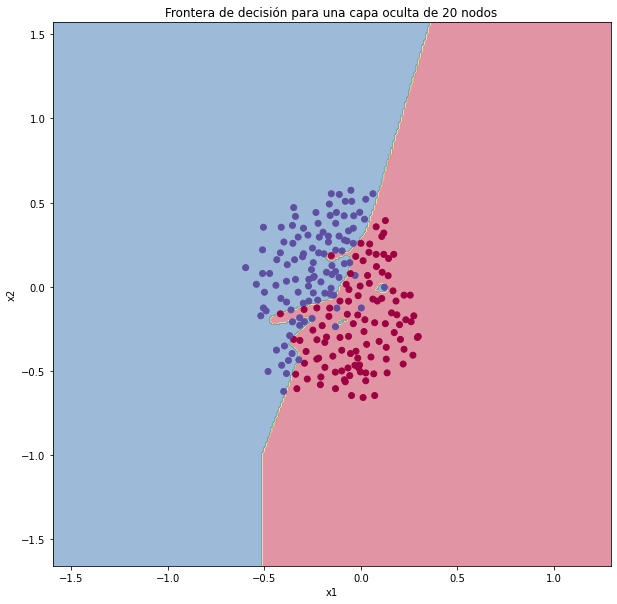

In [121]:
# Se muestra la frontera de decisión. Verificar que es razonable para el conjunto de entrenamiento.
mostrar_frontera_decision(lambda x: predecir_clase_datos_sinteticos(x, parametros_red_3capas), X_train, Y_train.flatten())
plt.title('Frontera de decisión para una capa oculta de ' + str(d_1) + ' nodos')

### Parte i)
Modificar la implementación de `red_tres_capas()` de modo que cuando se pase como parámetro `regularizar=True` utilice como función de costo `entropia_cruzada_regularizada()`. 

Costo luego de iteracion 0: 0.6531745033365441
Costo luego de iteracion 1000: 0.22820607956276293
Costo luego de iteracion 2000: 0.22137740654141116
Costo luego de iteracion 3000: 0.21571071966779565
Costo luego de iteracion 4000: 0.20829961525571683
Costo luego de iteracion 5000: 0.20571248082528387
Costo luego de iteracion 6000: 0.19533735662238225
Costo luego de iteracion 7000: 0.19150213742344188
Costo luego de iteracion 8000: 0.18577779286607965
Costo luego de iteracion 9000: 0.18097199929641988
Costo luego de iteracion 10000: 0.17627148517227356
Costo luego de iteracion 11000: 0.17379234769962132
Costo luego de iteracion 12000: 0.1703598259674267
Costo luego de iteracion 13000: 0.16149709340209772
Costo luego de iteracion 14000: 0.15500726836115217
Costo luego de iteracion 15000: 0.1570609967130124
Costo luego de iteracion 16000: 0.15057896541536422
Costo luego de iteracion 17000: 0.15017951340825275
Costo luego de iteracion 18000: 0.1468762440318317
Costo luego de iteracion 1900

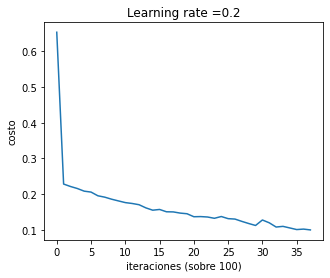

In [129]:
# Con regularización
parametros_red_3capas_regularizada = red_tres_capas(X_train, Y_train, dims_capas = [d_0, d_1, d_2, d_3], 
                                                    learning_rate = 0.2, num_iter = 38000, mostrar_costo=True,
                                                    regularizar=True, reg_factor=1e-3)


El porcentaje de aciertos es 0.971564


Text(0.5, 1.0, 'Frontera de decisión para una capa oculta de 20 nodos')

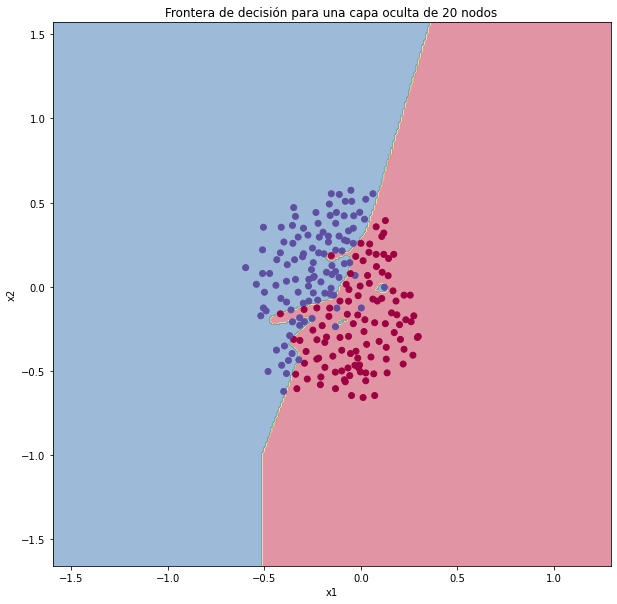

In [130]:
predicciones_train = predecir_clase_datos_sinteticos(X_train, parametros_red_3capas_regularizada)
porcentaje_aciertos = np.mean(predicciones_train==Y_train)
print('El porcentaje de aciertos es %f' % porcentaje_aciertos)

# Se muestra la frontera de decisión. Verificar que es razonable para el conjunto de entrenamiento.
mostrar_frontera_decision(lambda x: predecir_clase_datos_sinteticos(x, parametros_red_3capas_regularizada), X_train, Y_train.flatten())
plt.title('Frontera de decisión para una capa oculta de ' + str(d_1) + ' nodos')

### Parte j)
¿Considera que el valor por defecto (1e-3) del factor de regularización es adecuado? Comente como influye este factor en la solución y cómo eligiría su valor más adecuado.

La frontera de decisión sigue siendo compleja, por lo que la regularización no tuvo el efecto deseado de disminuir el overfitting. En particular se obervan manchas azules entre los datos rojos causadas por datos que parecieran ser atípicos.

Aumentando el factor de regularización se obtiene un menor overfitting, dado que la regularización "penaliza" ajustarse mucho a los datos. Para hallar el mejor valor de regularización se debe utiliar un conjunto de validación, o validación cruzada, eligiendo el factor que obtenga el mejor error de validación.